In [6]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
import geopandas as gpd
import json

plotly.offline.init_notebook_mode(connected=True)

In [10]:
def load_geoJson( file_in):
    
    with open(file_in) as file_in:
        districts = json.load(file_in)
    
    district_features = districts['features']
    
    return district_features

In [3]:
def create_geoDict (geoJson):
    
    geoJSON=dict(type= 'FeatureCollection', 
             features = [])
    
    for k, tfeature in enumerate(geoJson):
        geo_feature = dict(id=k, type= "Feature")
        geo_feature['properties'] = tfeature['properties']
        geo_feature['geometry'] = tfeature['geometry']  
        geoJSON['features'].append(geo_feature)
        
    return geoJSON

In [14]:
file_in = '2009_districts.geojson'
districts_geo = load_geoJson(file_in)
districts_geo_dict = create_geoDict (districts_geo)

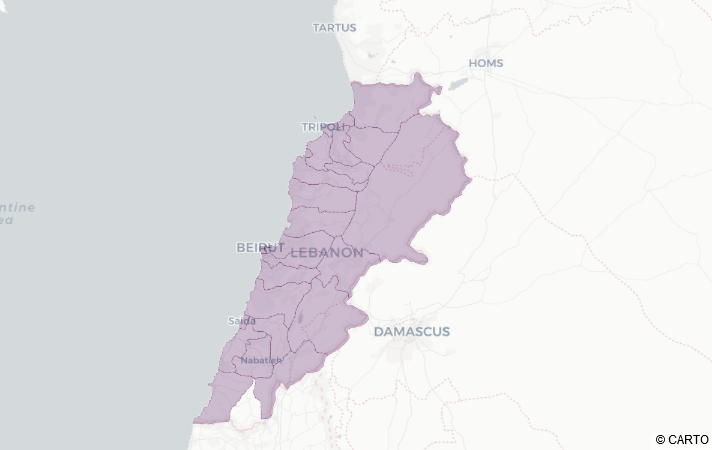

In [28]:
fig = go.Figure(go.Choroplethmapbox(geojson=districts_geo_dict, locations = list(range(0, len(districts_geo_dict['features']))),
                                    z=[0]*len(districts_geo_dict['features']),
                                    colorscale="Viridis", zmin=0, zmax=4, marker_line_width=0, showscale = False, 
                                    marker_opacity=0.25))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=7, mapbox_center = {"lon": 36, "lat": 34})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()